In [1]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 39.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=23484fbf7e7e51f5b270d65a189f92339eb1288e85d7812870d29a456151518b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pa

### Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
import xgboost as xgb
from ydata_profiling import ProfileReport

### Fetching Data

In [3]:
netflix = yf.Ticker('NFLX')

In [4]:
netflix_data = netflix.history(period='15y')

In [5]:
df = pd.DataFrame(netflix_data)

### Exploratory Data Analysis(EDA)

In [12]:
print(df)

                          Date        Open        High         Low  \
0    2009-03-30 00:00:00-04:00    5.644285    6.048571    5.578571   
1    2009-03-31 00:00:00-04:00    6.030000    6.281428    5.952857   
2    2009-04-01 00:00:00-04:00    6.111428    6.282857    6.017142   
3    2009-04-02 00:00:00-04:00    6.252857    6.275714    6.141428   
4    2009-04-03 00:00:00-04:00    6.152857    6.264285    6.081428   
...                        ...         ...         ...         ...   
3771 2024-03-22 00:00:00-04:00  624.159973  629.049988  621.000000   
3772 2024-03-25 00:00:00-04:00  627.900024  630.460022  623.159973   
3773 2024-03-26 00:00:00-04:00  625.200012  634.389893  619.183594   
3774 2024-03-27 00:00:00-04:00  629.010010  631.349976  610.729980   
3775 2024-03-28 00:00:00-04:00  614.989990  615.000000  601.590027   

           Close    Volume  Dividends  Stock Splits  
0       6.004285  19386780        0.0           0.0  
1       6.131428  12465432        0.0           0.0

In [8]:
df.reset_index(inplace=True)

In [13]:
df.shape

(3776, 8)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3776 entries, 0 to 3775
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          3776 non-null   datetime64[ns, America/New_York]
 1   Open          3776 non-null   float64                         
 2   High          3776 non-null   float64                         
 3   Low           3776 non-null   float64                         
 4   Close         3776 non-null   float64                         
 5   Volume        3776 non-null   int64                           
 6   Dividends     3776 non-null   float64                         
 7   Stock Splits  3776 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 236.1 KB


In [16]:
print(df.describe())

              Open         High          Low        Close        Volume  \
count  3776.000000  3776.000000  3776.000000  3776.000000  3.776000e+03   
mean    198.415852   201.435154   195.302250   198.440290  1.699248e+07   
std     185.871643   188.411078   183.169808   185.807488  1.956873e+07   
min       5.345714     5.362857     5.178571     5.297142  0.000000e+00   
25%      32.018570    32.505356    31.228571    31.929286  5.816079e+06   
50%     119.785000   122.185001   117.305000   119.140003  1.054005e+07   
75%     350.962509   356.443741   344.795006   350.950012  2.114354e+07   
max     692.349976   700.989380   686.090027   691.690002  3.155412e+08   

       Dividends  Stock Splits  
count     3776.0   3776.000000  
mean         0.0      0.001854  
std          0.0      0.113915  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0      7.000000  


In [ ]:
df['Dividends'].value_counts()

Dividends
0.0    3776
Name: count, dtype: int64

In [ ]:
df['Stock Splits'].value_counts()

Stock Splits
0.0    3775
7.0       1
Name: count, dtype: int64

In [9]:
profile = ProfileReport(df)
profile.to_file("Analysis.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
#droping Dividends because this column does not have varieties and Stock Splits because it does not affecting predictions and have only one unique value
df.drop(columns=['Dividends','Stock Splits'], inplace=True)

In [18]:
df['Date'].dtype

datetime64[ns, America/New_York]

In [19]:
#changing time according to india
df['Date'] = df['Date'].dt.tz_convert('Asia/Kolkata')

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume
3771,2024-03-22 09:30:00+05:30,624.159973,629.049988,621.000000,628.010010,2134100
3772,2024-03-25 09:30:00+05:30,627.900024,630.460022,623.159973,627.460022,1803300
3773,2024-03-26 09:30:00+05:30,625.200012,634.390015,619.179993,629.239990,2804500
3774,2024-03-27 09:30:00+05:30,629.010010,631.349976,610.729980,613.530029,2628300
3775,2024-03-28 09:30:00+05:30,614.989990,615.000000,601.590027,607.330017,3708800


In [20]:
figure = go.Figure(data=[go.Candlestick(x=df["Date"],
                                        open=df["Open"],
                                        high=df["High"],
                                        low=df["Low"],
                                        close=df["Close"])])
figure.update_layout(title = "Netflix Stock Price Data",
                     xaxis_rangeslider_visible=False)
figure.show()

### Feature Engineering

In [21]:
df['Year']= df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']= df['Date'].dt.day

In [23]:
print(df.head())

                       Date      Open      High       Low     Close    Volume  \
0 2009-03-30 09:30:00+05:30  5.644285  6.048571  5.578571  6.004285  19386780   
1 2009-03-31 09:30:00+05:30  6.030000  6.281428  5.952857  6.131428  12465432   
2 2009-04-01 09:30:00+05:30  6.111428  6.282857  6.017142  6.124285  10380020   
3 2009-04-02 09:30:00+05:30  6.252857  6.275714  6.141428  6.161428  10932488   
4 2009-04-03 09:30:00+05:30  6.152857  6.264285  6.081428  6.152857   7198632   

   Year  Month  Day  
0  2009      3   30  
1  2009      3   31  
2  2009      4    1  
3  2009      4    2  
4  2009      4    3  


In [24]:
df.drop(columns='Date',inplace=True) #because is always constant i.e.  9:30

In [26]:
df['Year'].min(),df['Year'].max()

(2009, 2024)

In [27]:
df['is_quarter_end'] = np.where(df['Month']%3==0,1,0)

<Axes: >

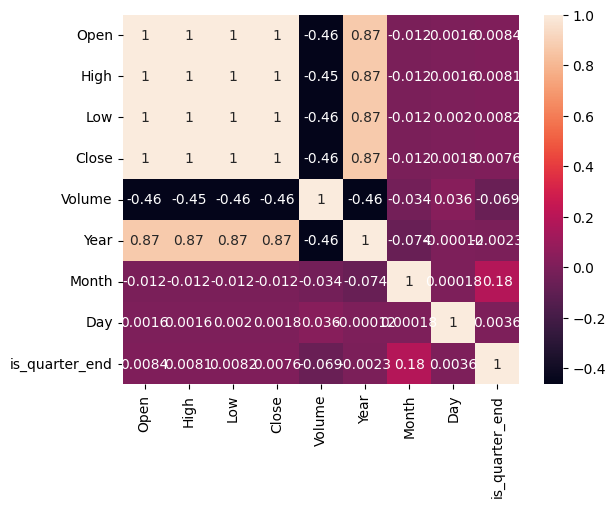

In [28]:
sns.heatmap(df.corr(),annot=True)

The heatmap shows that OHLS are highly correlated which is inherited. So, for prediction I gonna try that model which is robust with correlated columns

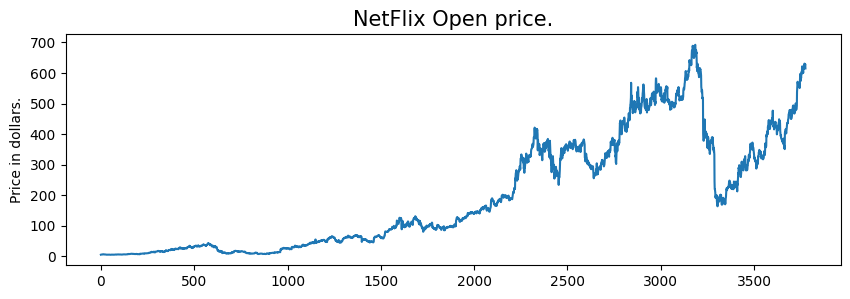

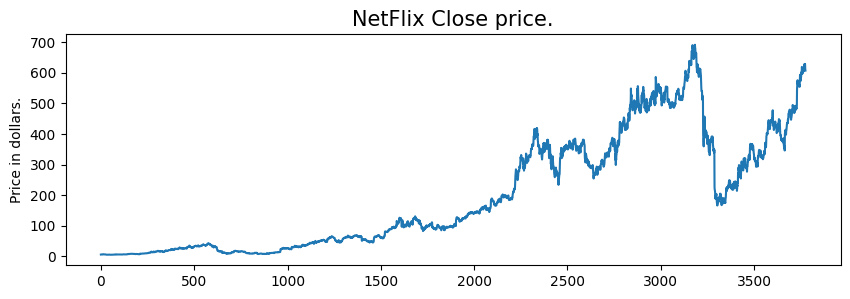

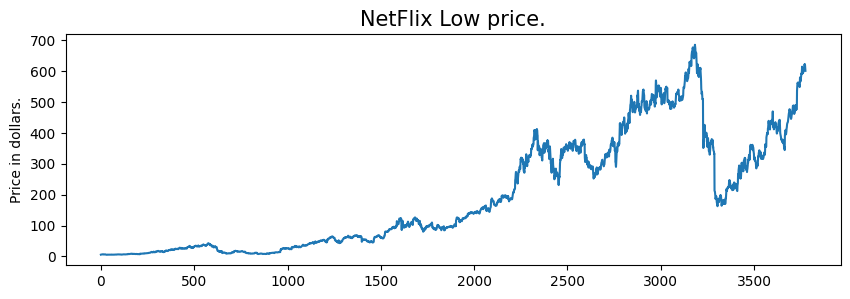

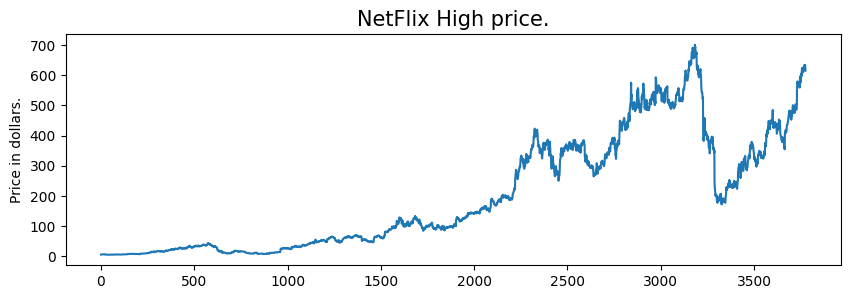

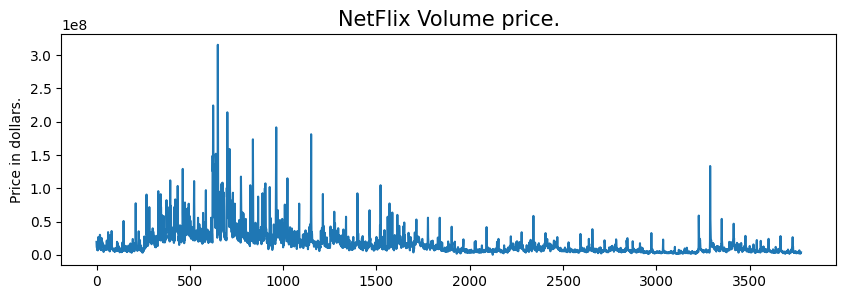

In [29]:
for col in ['Open','Close','Low','High','Volume']:
    plt.figure(figsize=(10,3))
    plt.plot(df[col])
    plt.title(f"NetFlix {col} price.", fontsize=15)
    plt.ylabel('Price in dollars.')
    plt.show()

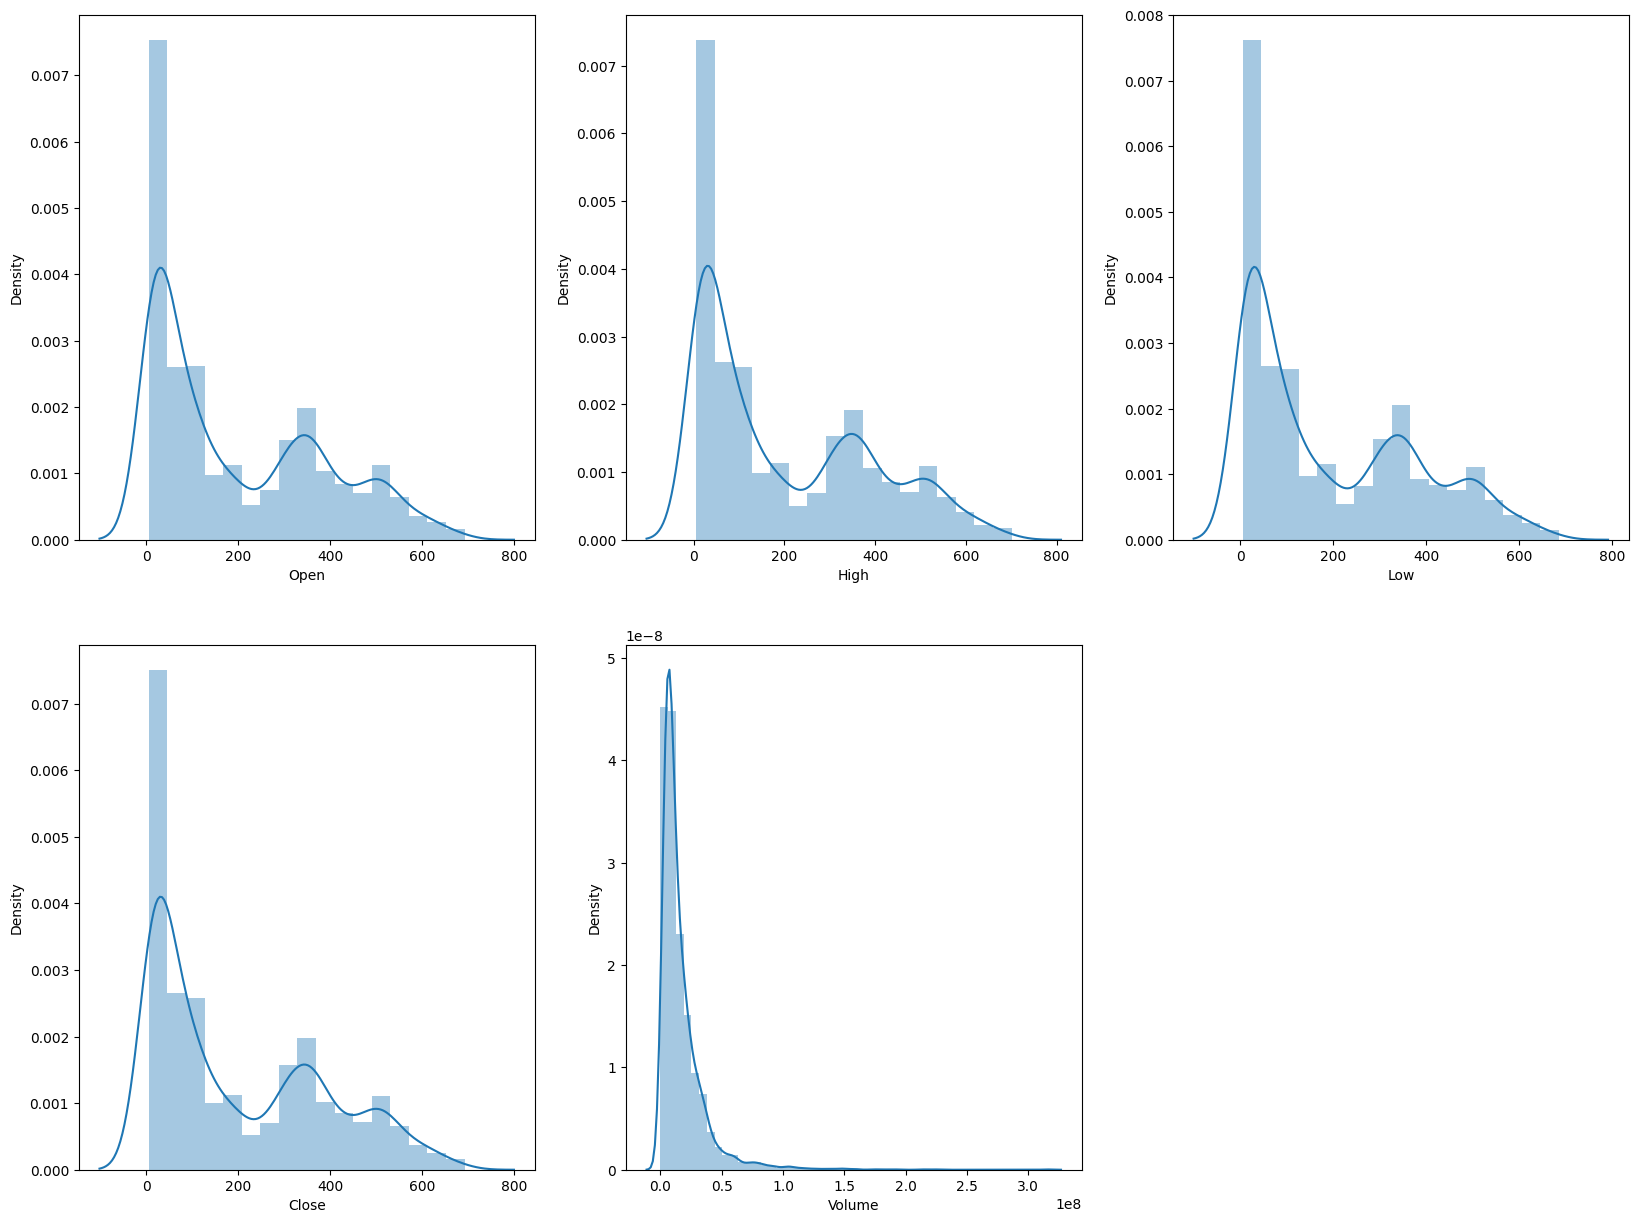

In [30]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,15))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])
plt.show()

In [31]:
df['Target'] = df['Close'].shift(-1)

In [34]:
# I am going to predict the close value of tomarrow by using past data
X=df[:-1].drop(columns='Target')
y=df[:-1]['Target']

In [33]:
print(df.tail())

            Open        High         Low       Close   Volume  Year  Month  \
3771  624.159973  629.049988  621.000000  628.010010  2135688  2024      3   
3772  627.900024  630.460022  623.159973  627.460022  1803264  2024      3   
3773  625.200012  634.389893  619.183594  629.239990  2804453  2024      3   
3774  629.010010  631.349976  610.729980  613.530029  2628267  2024      3   
3775  614.989990  615.000000  601.590027  607.330017  3708803  2024      3   

      Day  is_quarter_end      Target  
3771   22               1  627.460022  
3772   25               1  629.239990  
3773   26               1  613.530029  
3774   27               1  607.330017  
3775   28               1         NaN  


In [35]:
X.shape,y.shape

((3775, 9), (3775,))

### Data Preprocessing

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [67]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2831, 9), (2831,), (944, 9), (944,))

In [68]:
scaler=StandardScaler()
X_train['Volume_scaled'] = scaler.fit_transform(X_train[['Volume']])
X_test['Volume_scaled']=scaler.transform(X_test[['Volume']])
minmaxO = MinMaxScaler()
X_train['Open_scaled']= minmaxO.fit_transform(X_train[['Open']])
X_test['Open_scaled']= minmaxO.transform(X_test[['Open']])

minmaxH = MinMaxScaler()
X_train['High_scaled']= minmaxH.fit_transform(X_train[['High']])
X_test['High_scaled']= minmaxH.transform(X_test[['High']])

minmaxL = MinMaxScaler()
X_train['Low_scaled']= minmaxL.fit_transform(X_train[['Low']])
X_test['Low_scaled']= minmaxL.transform(X_test[['Low']])

minmaxC = MinMaxScaler()
X_train['Close_scaled'] = minmaxC.fit_transform(X_train[['Close']])
X_test['Close_scaled'] = minmaxC.transform(X_test[['Close']])

In [69]:
X_train_scaled = X_train.drop(columns=['Volume','Open','High','Low','Close'])
X_test_scaled = X_test.drop(columns=['Volume','Open','High','Low','Close'])
X_train.drop(columns=['Volume_scaled','Open_scaled','High_scaled','Low_scaled','Close_scaled'],inplace=True)
X_test.drop(columns=['Volume_scaled','Open_scaled','High_scaled','Low_scaled','Close_scaled'],inplace=True)

In [70]:
print(X_train.head())

            Open        High         Low       Close    Volume  Year  Month  \
1122   43.119999   43.778572   42.621429   43.057999  21961212  2013      9   
1349   62.151428   64.278557   62.078571   64.238571  27334916  2014      8   
69      5.521428    5.552857    5.418571    5.528571   7612094  2009      7   
3324  182.639999  185.860001  180.850006  182.940002  13074280  2022      6   
3184  691.609985  691.739990  679.734985  682.020020   2014992  2021     11   

      Day  is_quarter_end  
1122   12               1  
1349    7               0  
69      8               0  
3324   10               1  
3184   18               0  


In [71]:
print(X_train_scaled.head())

      Year  Month  Day  is_quarter_end  Volume_scaled  Open_scaled  \
1122  2013      9   12               1       0.261191     0.054976   
1349  2014      8    7               0       0.534477     0.082678   
69    2009      7    8               0      -0.468553     0.000247   
3324  2022      6   10               1      -0.190766     0.258063   
3184  2021     11   18               0      -0.753201     0.998923   

      High_scaled  Low_scaled  Close_scaled  
1122     0.055141    0.054934      0.054901  
1349     0.084614    0.083511      0.085763  
69       0.000185    0.000294      0.000219  
3324     0.259409    0.257951      0.258718  
3184     0.986702    0.990666      0.985910  


### Model Training and Evaluation

In [72]:
scaled_result_rmse=[]
result_rmse = []
scaled_result_r2=[]
result_r2 = []

In [73]:
# Non Scale data
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
result_rmse.append(lr_rmse)
result_r2.append(r2_score(y_test,lr_predictions))

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
result_rmse.append(rf_rmse)
result_r2.append(r2_score(y_test,rf_predictions))

# Gradient Boosting Machines (GBM)
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=0)
gbm_model.fit(X_train, y_train)
gbm_predictions = gbm_model.predict(X_test)
gbm_rmse = mean_squared_error(y_test, gbm_predictions, squared=False)
result_rmse.append(gbm_rmse)
result_r2.append(r2_score(y_test,gbm_predictions))

#XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
result_rmse.append(xgb_rmse)
result_r2.append(r2_score(y_test,xgb_pred))



In [74]:
# Scale data
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
scaled_result_rmse.append(lr_rmse)
scaled_result_r2.append(r2_score(y_test,lr_predictions))

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
scaled_result_rmse.append(rf_rmse)
scaled_result_r2.append(r2_score(y_test,rf_predictions))

# Gradient Boosting Machines (GBM)
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=0)
gbm_model.fit(X_train_scaled, y_train)
gbm_predictions = gbm_model.predict(X_test_scaled)
gbm_rmse = mean_squared_error(y_test, gbm_predictions, squared=False)
scaled_result_rmse.append(gbm_rmse)
scaled_result_r2.append(r2_score(y_test,gbm_predictions))

#XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_scaled,y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
scaled_result_rmse.append(xgb_rmse)
scaled_result_r2.append(r2_score(y_test,xgb_pred))


In [75]:
def Rmse(scores):
    Rmse = []
    for i in scores:
        Rmse.append(np.sqrt(-i))
    cv_rmse = np.mean(Rmse)
    return cv_rmse

In [76]:
from sklearn.model_selection import cross_val_score, KFold, TimeSeriesSplit
S = []
R = []
models = [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor(n_estimators=100, random_state=0),xgb.XGBRegressor()]
for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    R_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    S.append(Rmse(scores))
    R.append(np.mean(R_scores))
S,R

([5.559145050266755,
  14.516130357233328,
  14.20927383755858,
  20.875414756541176],
 [0.9921762848814888,
  0.929746494476799,
  0.9367602573559608,
  0.8233523225671318])

In [77]:
r = {
    "r2_score(scaled_version)":scaled_result_r2,
    "rmse(scaled_version)":scaled_result_rmse,
    "r2_score":result_r2,
    "rmse": result_rmse,
    "cv_score_mean_rmse":S,
    "cv_score_mean_r2":R,
}
Index = ["Linear Regression","Random Forest Regressor","Gradient Boosting Regressor","XGBoost Regressor"]
Result = pd.DataFrame(r,index = Index)
print(Result)

                             r2_score(scaled_version)  rmse(scaled_version)  \
Linear Regression                            0.998428              7.421777   
Random Forest Regressor                      0.998152              8.045972   
Gradient Boosting Regressor                  0.998122              8.112625   
XGBoost Regressor                            0.997446              9.459283   

                             r2_score      rmse  cv_score_mean_rmse  \
Linear Regression            0.998428  7.421777            5.559145   
Random Forest Regressor      0.998162  8.025113           14.516130   
Gradient Boosting Regressor  0.998120  8.115394           14.209274   
XGBoost Regressor            0.997684  9.007636           20.875415   

                             cv_score_mean_r2  
Linear Regression                    0.992176  
Random Forest Regressor              0.929746  
Gradient Boosting Regressor          0.936760  
XGBoost Regressor                    0.823352  


According to result dataframe linear regression is doing better even without scalling. So going with linear regression....

In [78]:
#Again confirming is that any overfitting with linear regression even cvscore shows that its
tscv = TimeSeriesSplit(n_splits=10)
model = LinearRegression()
# Apply cross-validation with custom scoring functions
mse_scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X, y, cv=tscv, scoring='r2')

# Interpret Results
print("Mean RMSE:", np.sqrt(-mse_scores.mean()))
print("Mean R2 Score:", r2_scores.mean())

Mean RMSE: 7.481142714185042
Mean R2 Score: 0.9812283815624774


In [79]:
# even though Linear Regression is performing very well, just trying
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [80]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dense(units=16))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 9, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 31433 (122.79 KB)
Trainable params: 31433 (122.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
lstm_model.fit(X_train, y_train, epochs=100,batch_size=32)

# Step 4: Make predictions using LSTM model
lstm_predictions = lstm_model.predict(X_test)
lstm_rmse = mean_squared_error(y_test, lstm_predictions, squared=False)

Epoch 1/100
89/89 [==============================] - 1s 9ms/step - loss: 4696.5586
Epoch 2/100
89/89 [==============================] - 1s 8ms/step - loss: 5280.9019
Epoch 3/100
89/89 [==============================] - 1s 9ms/step - loss: 4616.2002
Epoch 4/100
89/89 [==============================] - 1s 10ms/step - loss: 4606.9927
Epoch 5/100
89/89 [==============================] - 0s 5ms/step - loss: 4699.3984
Epoch 6/100
89/89 [==============================] - 1s 6ms/step - loss: 4912.3301
Epoch 7/100
89/89 [==============================] - 1s 6ms/step - loss: 4576.0547
Epoch 8/100
89/89 [==============================] - 1s 6ms/step - loss: 4566.2925
Epoch 9/100
89/89 [==============================] - 1s 6ms/step - loss: 4558.4106
Epoch 10/100
89/89 [==============================] - 1s 6ms/step - loss: 4733.0259
Epoch 11/100
89/89 [==============================] - 1s 6ms/step - loss: 4462.6978
Epoch 12/100
89/89 [==============================] - 1s 8ms/step - loss: 4609.6523


In [83]:
lstm_rmse

16.35499281223563

In [84]:
y_test = np.array(y_test)

In [85]:
predictions =  {"Linear Regression":lr_predictions,
         "Random Forest Regressor":rf_predictions,
         "Gradient Boosting Regressor":gbm_predictions,
         "XGBoost Regressor":xgb_pred,
         'LSTM':lstm_predictions}


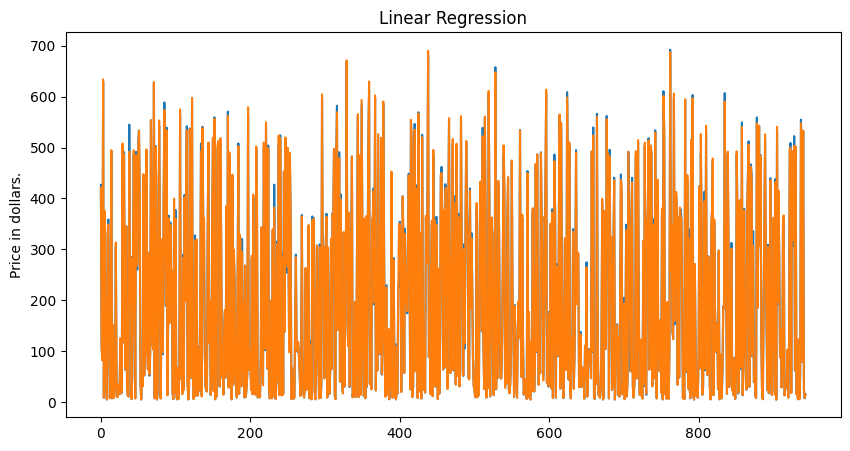

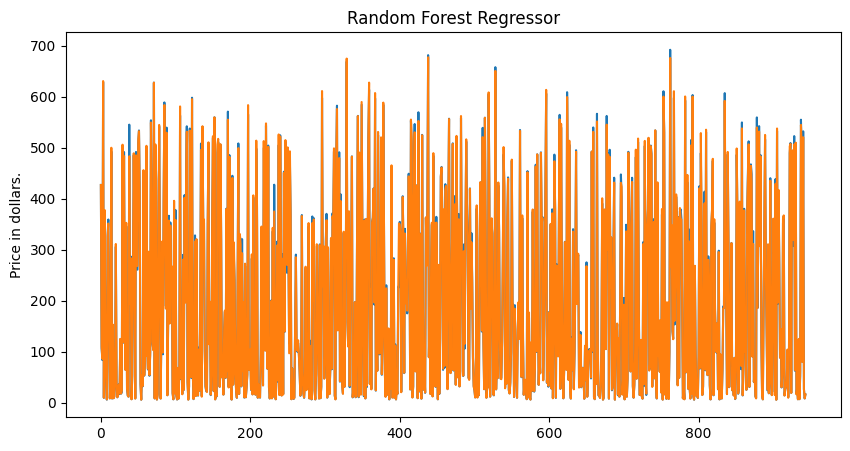

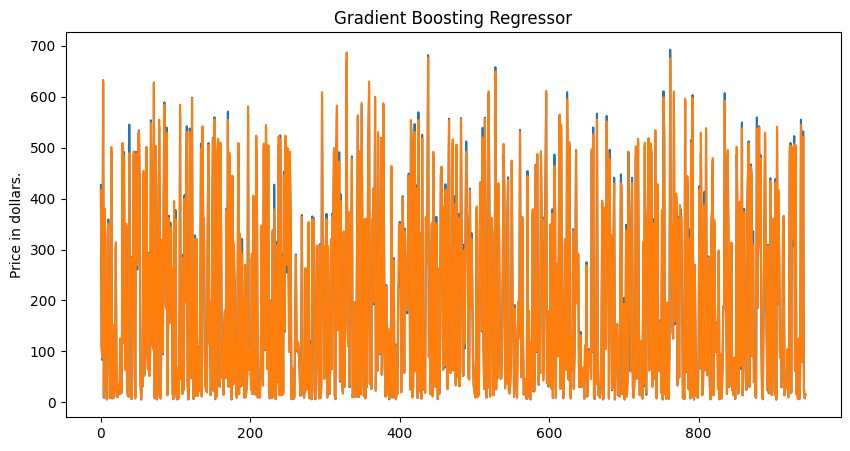

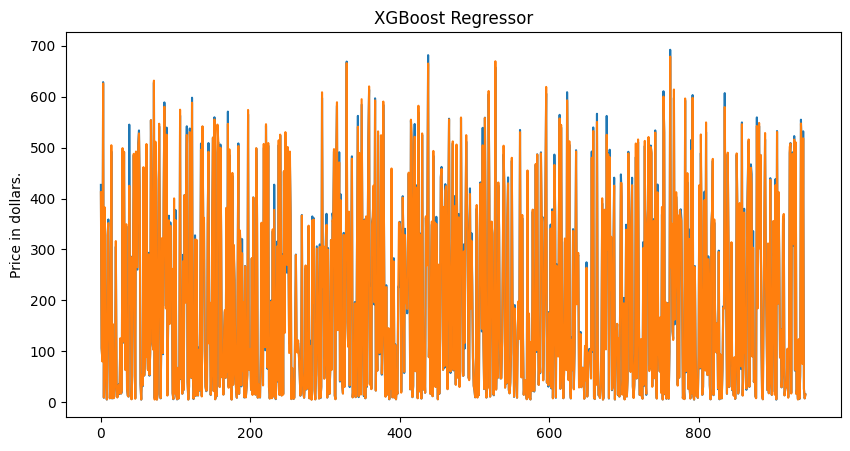

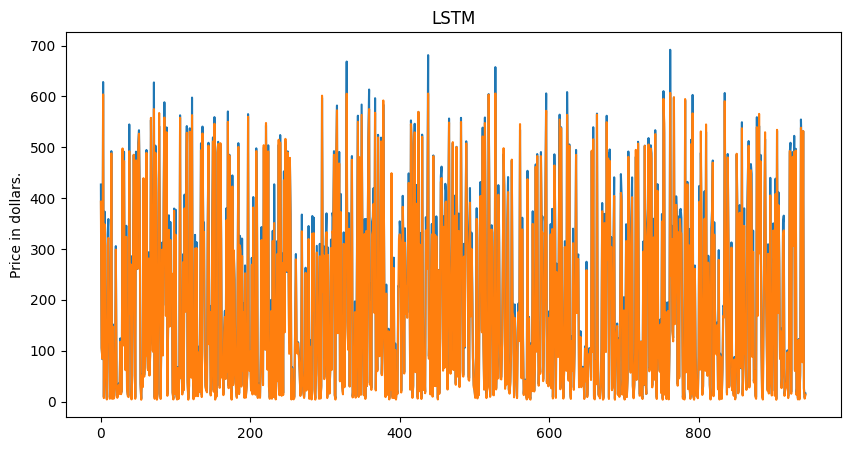

In [86]:
for l,pred in predictions.items():
    plt.figure(figsize=(10,5))
    plt.plot(y_test)
    plt.plot(pred)
    plt.title(l)
    plt.ylabel('Price in dollars.')
    plt.show()

In [87]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.9984278251878436

In [92]:
input = np.array([614.989990,615.000000,601.590027,607.330017,3708803,2024,3,28 ,1])

In [94]:
model.predict([input])

array([607.02777025])